In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sklearn

In [4]:
import seaborn as sns

In [5]:
from sklearn.pipeline import Pipeline

In [6]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [7]:
file_name="housing_data.csv"
df=pd.read_csv(file_name)

In [8]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Question 1
Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your code in the image.

In [12]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [13]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Question 3
use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [35]:
df["floors"].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# Question 4 
use the function boxplot in the seaborn library to produce a plot that can be used to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Your output should look like this with the code that produced it (the colors may be different )


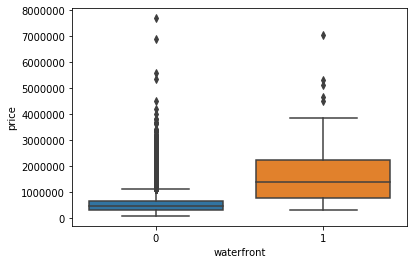

In [36]:
sns.boxplot(x="waterfront",y="price",data=df)

# Question 5 
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of the plot and the code used to generate it.

(0, 8086275.785271355)

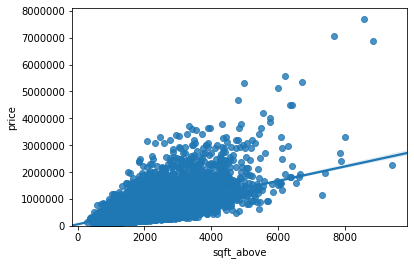

In [37]:
sns.regplot(x="sqft_above",y="price",data=df)
plt.ylim(0,)

# Question 6
Fit a linear regression model to predict the price using the feature 'sqft_living' then calculate the R^2.

In [47]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=df[["sqft_living"]]
y=df["price"]
lm.fit(x,y)
lm.score(x,y)

0.49285321790379316

In [49]:
df["floors"].replace("?",np.nan,inplace=True)

In [50]:
df["waterfront"].replace("?",np.nan,inplace=True)

In [51]:
df["lat"].replace("?",np.nan,inplace=True)

In [52]:
df["bedrooms"].replace("?",np.nan,inplace=True)

In [53]:
df["sqft_basement"].replace("?",np.nan,inplace=True)

In [54]:
df["view"].replace("?",np.nan,inplace=True)

In [55]:
df["bathrooms"].replace("?",np.nan,inplace=True)

In [56]:
df["sqft_living15"].replace("?",np.nan,inplace=True)

In [57]:
df["sqft_above"].replace("?",np.nan,inplace=True)

In [58]:
df["grade"].replace("?",np.nan,inplace=True)

In [59]:
df["sqft_living"].replace("?",np.nan,inplace=True)

In [60]:
mean=df["floors"].mean()
df["floors"].replace(np.nan,mean,inplace=True)

In [61]:
mean=df["waterfront"].mean()
df["waterfront"].replace(np.nan,mean,inplace=True)

In [62]:
mean=df["lat"].mean()
df["lat"].replace(np.nan,mean,inplace=True)
mean=df["bedrooms"].mean()
df["bedrooms"].replace(np.nan,mean,inplace=True)
mean=df["sqft_basement"].mean()
df["sqft_basement"].replace(np.nan,mean,inplace=True)
mean=df["view"].mean()
df["view"].replace(np.nan,mean,inplace=True)
mean=df["bathrooms"].mean()
df["bathrooms"].replace(np.nan,mean,inplace=True)
mean=df["sqft_living15"].mean()
df["sqft_living15"].replace(np.nan,mean,inplace=True)
mean=df["sqft_above"].mean()
df["sqft_above"].replace(np.nan,mean,inplace=True)
mean=df["grade"].mean()
df["grade"].replace(np.nan,mean,inplace=True)
mean=df["sqft_living"].mean()
df["sqft_living"].replace(np.nan,mean,inplace=True)

# Question 7
Fit a linear regression model to predict the 'price' using the list of features,the calculate the R^2.

In [73]:
features=["waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x=df[features]
y=df['price']
lm.fit(x,y)
lm.score(x,y)

0.6566841608452911

# Question 8
Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2.

In [83]:
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
features=["waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x=df[features]
y=df['price']
pipe.fit(x,y)
pipe.score(x,y)

0.7474518755917323

# Question 9
Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data.

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
features=["waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x=df[features]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train,y_train)
RigeModel.score(x_test,y_test)



0.642415720655223

# Question 10
Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1. Calculate the R^2 utilising the test data provided.

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
features=["waterfront","lat","bedrooms","sqft_basement","view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
x=df[features]
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
poly=Ridge(alpha=0.1)
poly.fit(x_train_pr,y_train)
poly.score(x_test_pr,y_test)


0.726492464588863